In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Separate features and target variable
X = df.drop('Diabetes_binary', axis=1)  # Features
y = df['Diabetes_binary']  # Target variable

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Compute class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(weights))

In [ ]:
# Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 75.34%


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Example: Predict for a new data point (replace with actual data)
new_data = np.array([[1.0, 1.0, 1.0, 40.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 5.0, 18.0, 15.0, 1.0, 0.0, 9.0, 4.0, 3.0]])
new_data_scaled = scaler.transform(new_data)
new_prediction = model.predict(new_data_scaled)
print(f'Predicted Diabetes Probability: {new_prediction[0][0]:.4f}')

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Diabetes Probability: 0.4579


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Generate summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

In [ ]:
# Count of diabetes cases
print(df['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


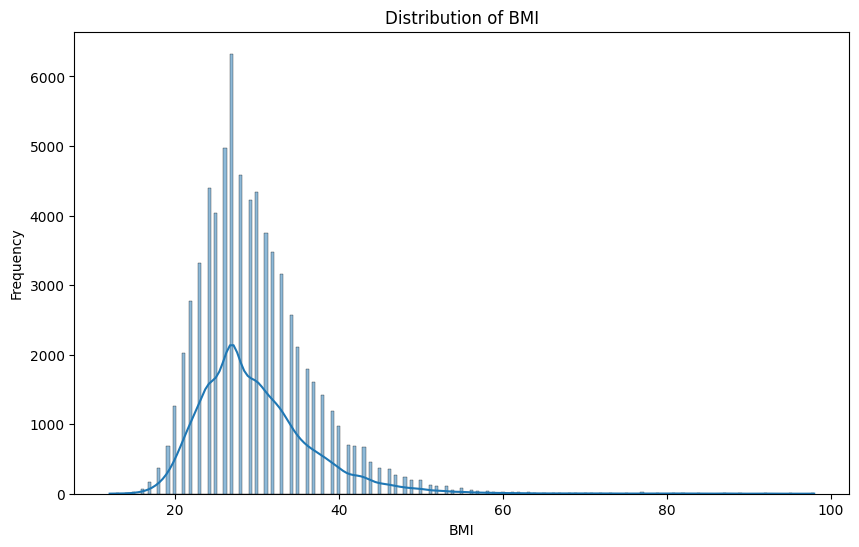

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

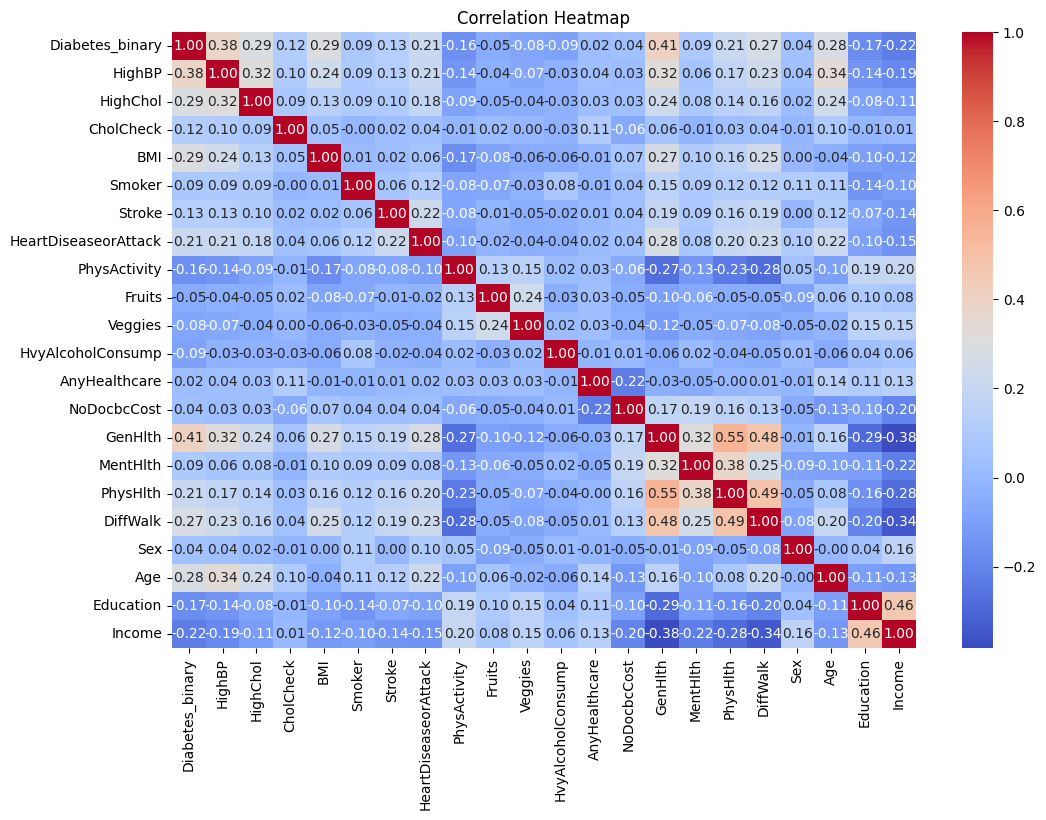

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


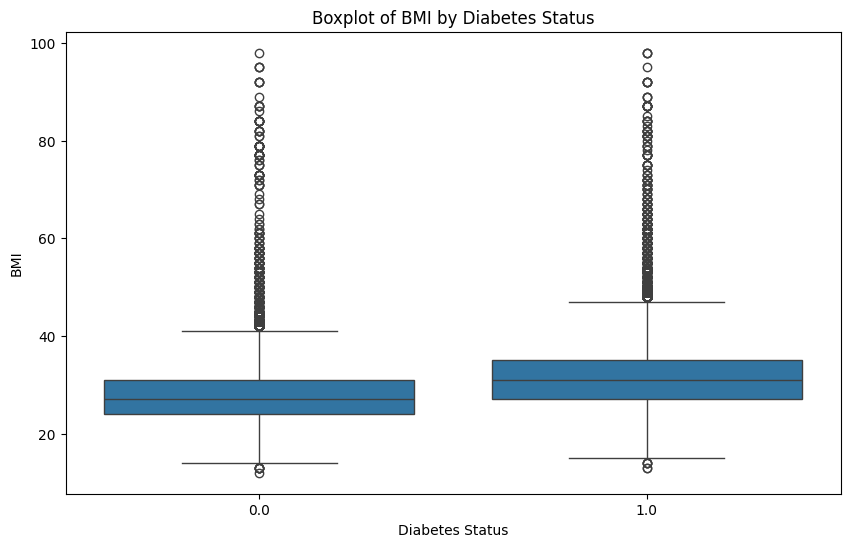

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('Boxplot of BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()


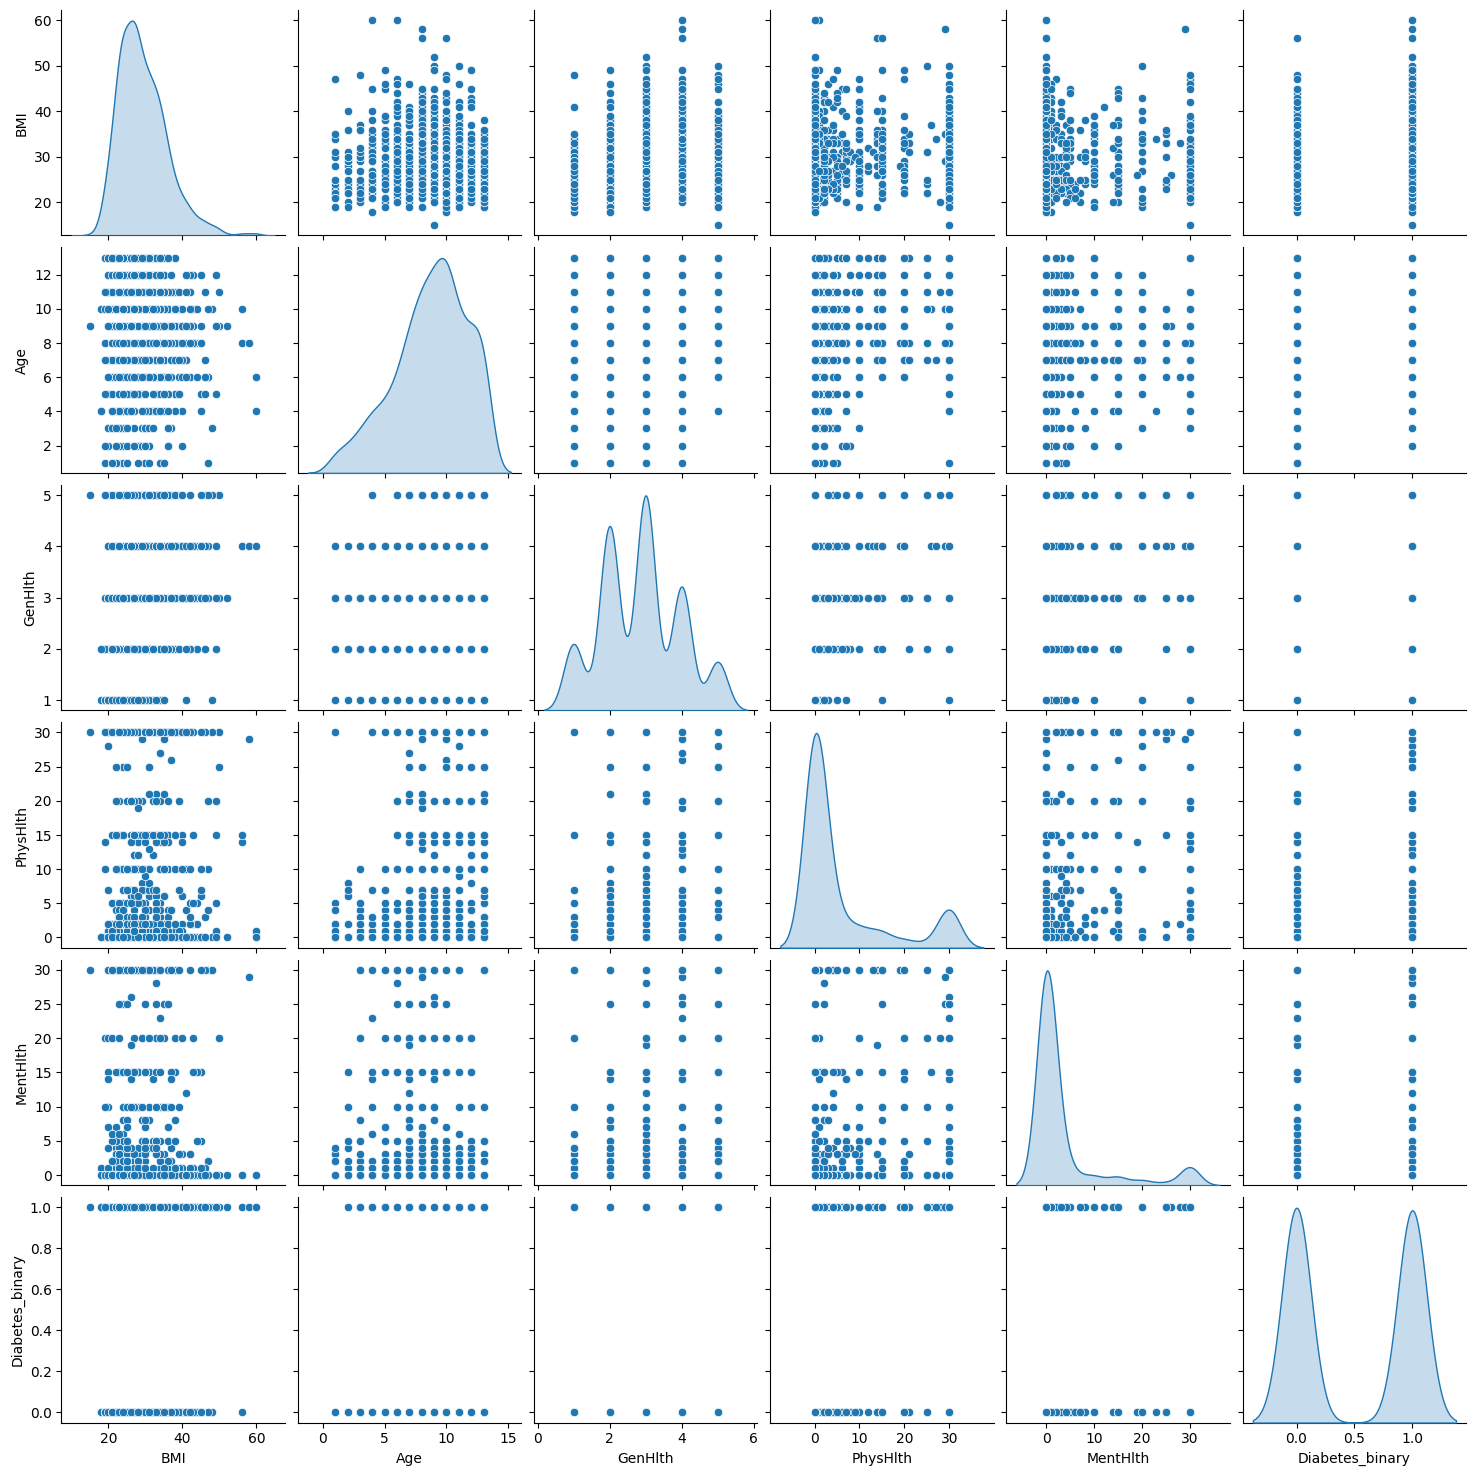

In [ ]:
selected_features = ['BMI', 'Age', 'GenHlth', 'PhysHlth', 'MentHlth', 'Diabetes_binary']
sns.pairplot(df[selected_features].sample(1000, random_state=42), diag_kind='kde')
plt.show()



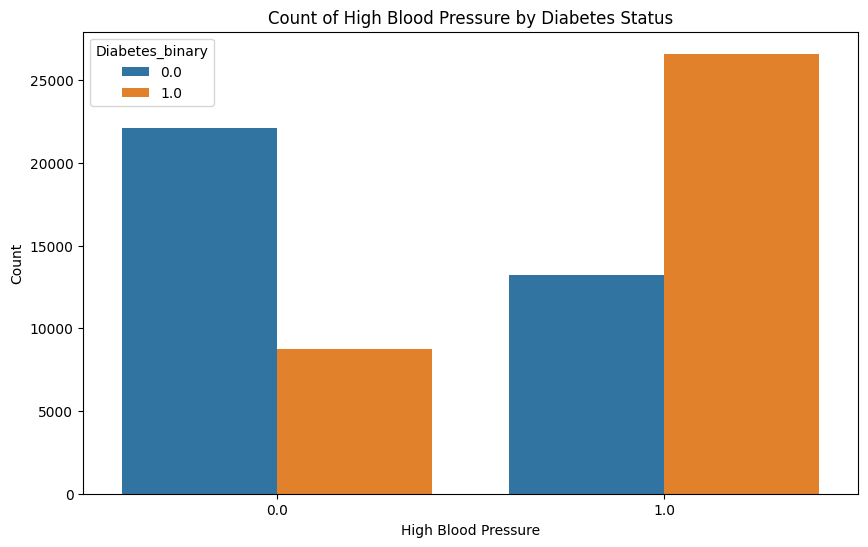

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df)
plt.title('Count of High Blood Pressure by Diabetes Status')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
# df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Use a smaller subset of data for faster tuning
df_sample = df.sample(5000, random_state=42)  # Use only 5000 rows

# Define features and target
X = df_sample.iloc[:, 1:]  # Features
y = df_sample.iloc[:, 0]   # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],          # Number of trees
    'max_depth': [10, 20, None],        # Depth of trees
    'min_samples_split': [2, 5],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],         # Minimum samples required at leaf node
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,   # Reduced iterations for faster search
    cv=3,        # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=1     # Prevents parallel processing issues
)

# Train the model
rf_random.fit(X_train, y_train)

# Get the best model
best_model = rf_random.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Print results
print(f"Best Parameters: {rf_random.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Accuracy: 0.7460
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       513
         1.0       0.71      0.81      0.76       487

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
df['Diabetes_binary']=df['Diabetes_binary'].replace(2, 1)

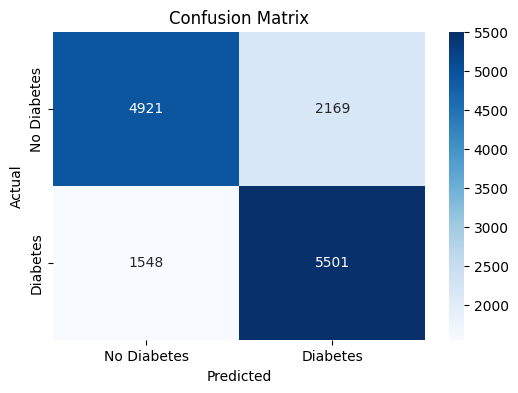

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [ ]:
# Assuming the target variable is the first column
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=["Diabetes_binary"])  # All columns except target
y = df["Diabetes_binary"]  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.7523870146403565
